In [1]:
pip install torch

  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.9/887.9 MB 12.8 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 594.3/594.3 MB 13.0 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 13.3 MB/s eta 0:00:001m13.9 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.0/88.0 MB 13.1 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 954.8/954.8 kB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 706.8/706.8 MB 12.9 MB/s eta 0:00:00m eta 0:00:010:00:02
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.1/193.1 MB 12.0 MB/s eta 0:00:00m eta 0:00:010:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.6/63.6 MB 13.2 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.5/267.5 MB 13.2 MB/s eta 0:0

In [20]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [21]:
import torch

import torch.nn as nn
import torch.nn.functional as F

In [22]:
class TorchClassifier(nn.Module):
    
    def __init__(self):
        super(TorchClassifier, self).__init__()
        self.layer1 = nn.Linear(16, 8)
        self.layer2 = nn.Linear(8, 4)
        self.layer3 = nn.Linear(4, 2)
        self.layer4 = nn.Linear(2, 1)
    
    def forward(self, x):
        x = F.elu(self.layer1(x))
        x = F.elu(self.layer2(x))
        x = F.elu(self.layer3(x))
        x = torch.sigmoid(self.layer4(x)) 
        return x

In [23]:
model = TorchClassifier()
print(model)

TorchClassifier(
  (layer1): Linear(in_features=16, out_features=8, bias=True)
  (layer2): Linear(in_features=8, out_features=4, bias=True)
  (layer3): Linear(in_features=4, out_features=2, bias=True)
  (layer4): Linear(in_features=2, out_features=1, bias=True)
)


In [24]:
model(torch.rand(16))

tensor([0.5645], grad_fn=<SigmoidBackward0>)

In [25]:
x, y = make_classification(n_samples = 1000, n_features = 16)

x_tr, x_test, y_tr, y_test = train_test_split(
    x, y, train_size = 0.8)
x_val, x_test, y_val, y_test = train_test_split(
    x_test, y_test, train_size = 0.5)

In [26]:
from torch.utils.data import Dataset

class NumpyDataset(Dataset):
    def __init__(self, x, y):
        
        if (x.shape[0] != y.shape[0]):
            raise Exception("incompatible arrays")
        
        y = y.reshape(-1,1)
        
        self.x = torch.from_numpy(x).to(torch.float)
        self.y = torch.from_numpy(y).to(torch.float)
        
    def __getitem__(self, i):
        return self.x[i], self.y[i]
    
    def __len__(self):
        return self.y.shape[0]

In [27]:
tr_data = NumpyDataset(x_tr, y_tr)
val_data = NumpyDataset(x_val, y_val)
test_data = NumpyDataset(x_test, y_test)

In [28]:
print(tr_data[0])
print("Length:", len(tr_data))

(tensor([-0.8547, -1.0185, -1.9117,  0.9911,  2.5834, -1.4721,  0.4941, -1.4791,
         2.9408,  1.0243, -1.9092,  1.8044,  0.6358, -0.5820,  0.1263,  2.9121]), tensor([1.]))
Length: 800


In [29]:
from torch.utils.data import DataLoader
tr_loader = iter(DataLoader(tr_data, batch_size = 2, shuffle = True))
print(next(tr_loader))

[tensor([[-0.7098,  0.3534, -0.4890, -1.3164, -0.6263,  0.2917, -0.9774, -0.3047,
          0.9233, -0.1164,  1.3196,  2.2821,  2.3386, -0.8109,  0.2774, -0.3061],
        [ 0.0348, -0.0355,  0.6456,  0.2781,  1.4780, -0.1833, -0.0591, -0.0505,
         -0.3739, -0.7677, -0.2277,  0.7815, -0.1190,  1.0826, -1.2062, -0.0711]]), tensor([[1.],
        [0.]])]


In [30]:
get_loss = F.binary_cross_entropy

In [31]:
print(get_loss(torch.tensor([1.]), torch.tensor([1.])))

tensor(0.)


In [32]:
tr_loader = DataLoader(tr_data, batch_size = 100, shuffle = True)
opt = torch.optim.Adam(model.parameters(), lr = 0.005)

In [33]:
def run_epoch(opt, tr_loader):
    for data in iter(tr_loader):
        x, y = data
        opt.zero_grad()
        loss = get_loss(model(x), y)
        loss.backward()
        opt.step()

    return get_loss(model(tr_data.x), tr_data.y)

In [34]:
tr_losses = []
val_losses = []

In [35]:
while len(val_losses) < 2 or val_losses[-1] < val_losses[-2]:
    print("EPOCH", len(tr_losses) + 1, end = " ")
    tr_losses.append(float(run_epoch(opt, tr_loader)))
    val_losses.append(float(get_loss(model(val_data.x), val_data.y)))
    print("| Train loss:", round(tr_losses[-1],4), end = " ")
    print("| Valid loss:", round(val_losses[-1],4))

EPOCH 1 | Train loss: 0.6897 | Valid loss: 0.6914
EPOCH 2 | Train loss: 0.6647 | Valid loss: 0.6679
EPOCH 3 | Train loss: 0.6343 | Valid loss: 0.6413
EPOCH 4 | Train loss: 0.5901 | Valid loss: 0.6033
EPOCH 5 | Train loss: 0.5322 | Valid loss: 0.5531
EPOCH 6 | Train loss: 0.4681 | Valid loss: 0.4954
EPOCH 7 | Train loss: 0.4126 | Valid loss: 0.4447
EPOCH 8 | Train loss: 0.3767 | Valid loss: 0.4132
EPOCH 9 | Train loss: 0.3577 | Valid loss: 0.3985
EPOCH 10 | Train loss: 0.3471 | Valid loss: 0.391
EPOCH 11 | Train loss: 0.3398 | Valid loss: 0.389
EPOCH 12 | Train loss: 0.334 | Valid loss: 0.3852
EPOCH 13 | Train loss: 0.3277 | Valid loss: 0.3792
EPOCH 14 | Train loss: 0.3221 | Valid loss: 0.3721
EPOCH 15 | Train loss: 0.317 | Valid loss: 0.3675
EPOCH 16 | Train loss: 0.3122 | Valid loss: 0.3627
EPOCH 17 | Train loss: 0.3075 | Valid loss: 0.3647


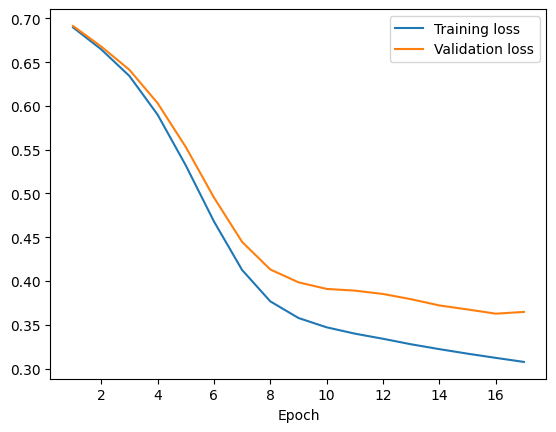

In [36]:
import matplotlib.pyplot as plt
def plot_losses(tr_loss, val_loss):
    epochs = np.array(range(len(tr_loss))) + 1
    plt.plot(epochs, tr_loss, label = "Training loss")
    plt.plot(epochs, val_loss, label = "Validation loss")
    plt.xlabel("Epoch")
    plt.legend()
    plt.show()

plot_losses(tr_losses, val_losses)

In [37]:
train_acc = accuracy_score(
    (model(tr_data.x) >= 0.5).to(float), tr_data.y)
val_acc = accuracy_score(
    (model(val_data.x) >= 0.5).to(float), val_data.y)
test_acc = accuracy_score(
    (model(test_data.x) >= 0.5).to(float), test_data.y)
print("Training accuracy:", train_acc)
print("Validation accuracy:", val_acc)
print("Test accuracy:", test_acc)

Training accuracy: 0.885
Validation accuracy: 0.87
Test accuracy: 0.84
